### Currently mostly for the 'intermediate' variables

In [4]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from comparison import ForecastToObsAlignment, Comparison
from observations import Climatology
from forecasts import ModelClimatology

#### Scoring
Scoring for threshold exceedence. No correction of spread (except t2m), because only the observed climatology is used for Brier.

In [5]:
combinations = pd.DataFrame({'obs':['sst-anom_1998-06-07_2019-08-31_7D-roll-mean_1-sst-simple-mean',
                                    'z-anom_1998-06-07_2019-08-31_7D-roll-mean_1-swvl-simple-mean',
                                    'swvl4-anom_1998-06-07_2019-08-31_7D-roll-mean_1-swvl-simple-mean',
                                    'swvl13-anom_1998-06-07_2019-08-31_7D-roll-mean_1-swvl-simple-mean',
                                    'tg-anom_1998-06-07_2019-10-31_7D-roll-mean_15-t2m-q095-adapted-mean',
                                    'tg-anom_1998-06-07_2019-10-31_14D-roll-mean_15-t2m-q095-adapted-mean',
                                    'tg-anom_1998-06-07_2019-10-31_7D-roll-mean_0.58-t2m-q075-mean'],
                            'clim':['sst-anom_clim_1998-06-07_2019-08-25_7D-roll-mean_1-sst-simple-mean_5_5_q0.75',
                                    'z-anom_clim_1998-06-07_2019-08-25_7D-roll-mean_1-swvl-simple-mean_5_5_q0.75',
                                    'swvl4-anom_clim_1998-06-07_2019-08-25_7D-roll-mean_1-swvl-simple-mean_5_5_q0.75',
                                    'swvl13-anom_clim_1998-06-07_2019-08-25_7D-roll-mean_1-swvl-simple-mean_5_5_q0.75',
                                    'tg-anom_clim_1998-06-07_2019-10-31_7D-roll-mean_15-t2m-q095-adapted-mean_5_5_q0.75',
                                    'tg-anom_clim_1998-06-07_2019-10-31_14D-roll-mean_15-t2m-q095-adapted-mean_5_5_q0.75',
                                    'tg-anom_clim_1998-06-07_2019-10-31_7D-roll-mean_0.58-t2m-q075-mean_5_5_q0.75'],
                            'books':['books_paper3-3-simple_sst-anom_JJA_45r1_7D-roll-mean_1-sst-simple-mean.csv',
                                     'books_paper3-3-simple_z-anom_JJA_45r1_7D-roll-mean_1-swvl-simple-mean.csv',
                                     'books_paper3-3-simple_swvl4-anom_JJA_45r1_7D-roll-mean_1-swvl-simple-mean.csv',
                                     'books_paper3-3-simple_swvl13-anom_JJA_45r1_7D-roll-mean_1-swvl-simple-mean.csv',
                                     'books_paper3-1_tg-anom_JJA_45r1_7D-roll-mean_15-t2m-q095-adapted-mean.csv',
                                     'books_paper3-1_tg-anom_JJA_45r1_14D-roll-mean_15-t2m-q095-adapted-mean.csv',
                                     'books_paper3-1_tg-anom_JJA_45r1_7D-roll-mean_0.58-t2m-q075-mean.csv'],
                             'modelclim':[None,
                                          None,
                                          None,
                                          None,
                                          'tg-anom_45r1_1998-06-07_2019-10-31_7D-roll-mean_15-t2m-q095-adapted-mean_5_5_q0.75',
                                          'tg-anom_45r1_1998-06-07_2019-10-31_14D-roll-mean_15-t2m-q095-adapted-mean_5_5_q0.75',
                                          'tg-anom_45r1_1998-06-07_2019-10-31_7D-roll-mean_0.58-t2m-q075-mean_5_5_q0.75'],
                            },
                           index = pd.Index(['sst','z','swvl4','swvl13','tg7D','tg14D','tg7Dhighres'], name = 'basevar'))

In [3]:
def get_match_frame(basevar) -> Comparison:
    al = ForecastToObsAlignment('JJA','45r1')
    al.recollect(booksname = combinations.loc[basevar,'books'])
    cl = Climatology(f'{basevar}-anom', name = combinations.loc[basevar,'clim'])
    cl.localclim()
    if not combinations.loc[basevar,'modelclim'] is None:
        mcl = ModelClimatology('45r1','tg', **{'name':combinations.loc[basevar,'modelclim']})
        mcl.local_clim()
    else:
        mcl = None
    return Comparison(al, climatology = cl, modelclimatology = mcl)

climatology directly loaded
lazy pi and bool observation construction


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


climatology directly loaded
lazy pi and bool observation construction


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


climatology directly loaded
lazy pi and bool observation construction
climatology directly loaded


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


lazy pi and bool observation construction


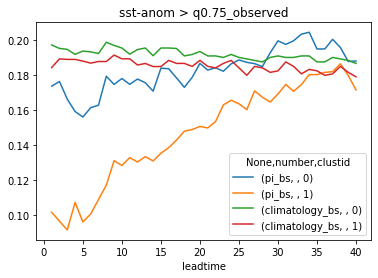

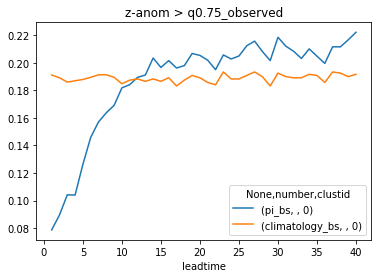

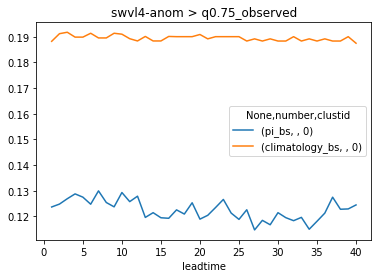

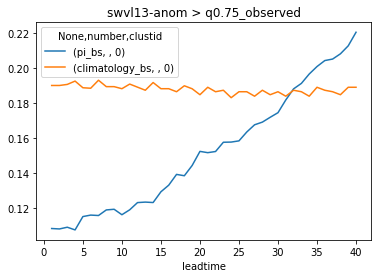

In [11]:
for var in combinations.index[:-3]:
    comp = get_match_frame(var)
    comp.brierscore()
    df = comp.frame.compute()
    mean_bs = df.groupby(['leadtime','clustid']).mean().loc[:,['pi_bs','climatology_bs']] # Mean over time
    mean_bs.unstack(-1).plot(title = f'{var}-anom > q{comp.quantile}_observed') # Unstacking the clustids

The worst skill for SST happens in cluster 0. This is the north-western one.

### Compare the different average tg. Beneficial to aggregate more in time? And less in space?

In [4]:
def skill_at_location(var, clustid: int = None):
    comp = get_match_frame(var)
    comp.brierscore()
    df = comp.frame.compute()
    mean_bs = df.groupby(['leadtime','clustid']).mean().loc[:,['pi_bs','climatology_bs']] # Mean over time
    mean_bs['bss'] = 1 - mean_bs['pi_bs'] / mean_bs['climatology_bs']
    fig, ax = plt.subplots()
    ax.hlines(0,0,40, color = 'black', ls = '--')
    if not clustid is None:
        mean_bs.loc[(slice(None),clustid),'bss'].unstack(-1).plot(ax = ax) # Unstacking the clustids
    else:
        mean_bs.loc[:,'bss'].unstack(-1).plot(ax = ax)
    ax.set_title(f'{var}-anom > q{comp.quantile}_observed')
    return fig, ax

climatology directly loaded
climatology directly loaded
lazy pi and bool observation construction


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


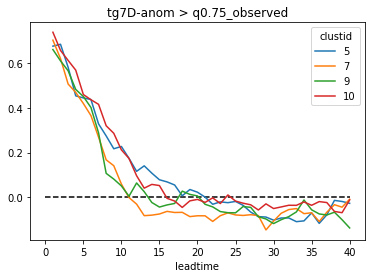

In [5]:
skill_at_location('tg7D', [5,7,9,10])
plt.show()

In [16]:
comp7 = get_match_frame('tg7D')
comp7.brierscore()
df7 = comp7.frame.compute()
print(df7['modelclimatology'].mean())
comp14 = get_match_frame('tg14D')
comp14.brierscore()
df14 = comp14.frame.compute()
print(df14['modelclimatology'].mean())

climatology directly loaded
climatology directly loaded
lazy pi and bool observation construction


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


0.91388935
climatology directly loaded
climatology directly loaded
lazy pi and bool observation construction
0.7700551


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<AxesSubplot:xlabel='time'>

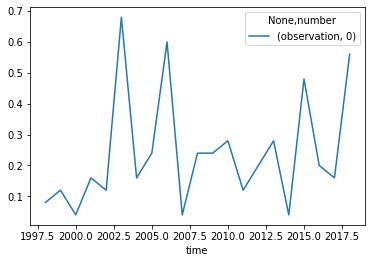

In [19]:
obtest = df14.loc[np.logical_and(df14['clustid'] == 9, df14['leadtime'] == 1),['observation','time']].set_index('time')
obtest.groupby(obtest.index.year).mean().plot()

climatology directly loaded
climatology directly loaded
lazy pi and bool observation construction


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


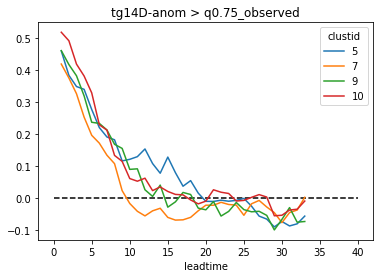

In [6]:
skill_at_location('tg14D', [5,7,9,10])
plt.show()

climatology directly loaded
climatology directly loaded
lazy pi and bool observation construction


/nobackup_1/users/straaten/VENV/lib64/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


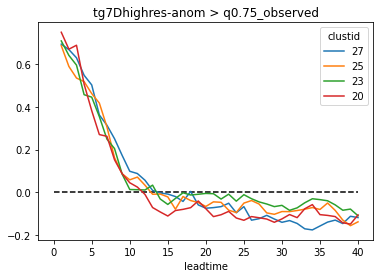

In [7]:
ids =  [27,25,23,20] #
skill_at_location('tg7Dhighres', ids)
plt.show()

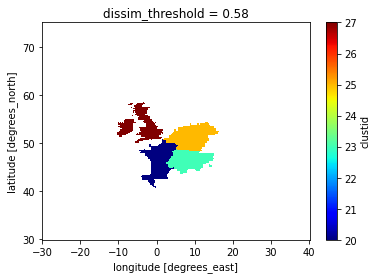

In [8]:
clusters = xr.open_dataarray('/nobackup/users/straaten/clusters/t2m-q075.nc').sel(dissim_threshold = 0.58)
limited = clusters.where(clusters.isin(ids), np.nan)
limited.plot(cmap = 'jet')

This latter skill plot of 7D average t2m > q075 shows a shorter forecast horizon than the 2 days of 1D > q0.75 within a week.

#### Properties
Differences in mean, stdev, before binarization of the observation. Possibly as a function of model leadtime

In [51]:
def get_subset_at(frame: pd.DataFrame, leadtime: int, clustid: int = 0) -> pd.DataFrame:
    subset = frame.loc[np.logical_and(frame['leadtime'] == leadtime, frame['clustid'] == clustid),:]
    anoms = subset.loc[:,['time','observation','ensmean']].set_index('time')
    return anoms

def fancy_plot(data: pd.DataFrame):
    left, width = 0.1, 0.7
    bottom, height = 0.1, 7
    spacing = 0.01

    rect_scatter = [left, bottom, width, height]
    rect_histy = [left + width + spacing, bottom, 0.15, height]

    # start with a square Figure
    fig = plt.figure(figsize = (4,0.35)) #figsize=(3, 3)

    ax = fig.add_axes(rect_scatter)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    for key in ['observation','ensmean']:
        yvals = data[key].values.squeeze()
        ax.scatter(data.index, yvals, label = key, alpha = 0.5)
        ypositions = np.linspace(start = yvals.min(), stop = yvals.max(), num = 100)
        ydensity = gaussian_kde(yvals)(ypositions)
        im = ax_histy.plot(ydensity,ypositions, label = key)
        ax_histy.hlines(yvals.mean(), xmin = 0, xmax = ydensity.max(), colors = im[0].get_color(), ls = 'dashed')
    ax.set_xlabel('time')
    ax_histy.set_xlabel('probability density')
    return fig, ax, ax_histy

climatology directly loaded


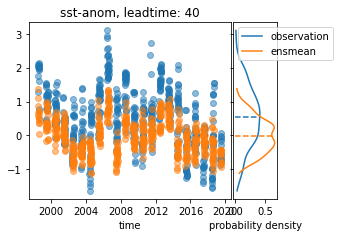

climatology directly loaded


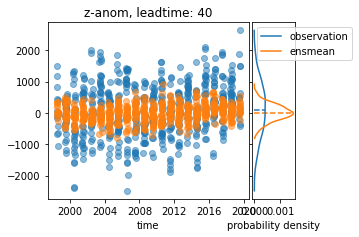

climatology directly loaded


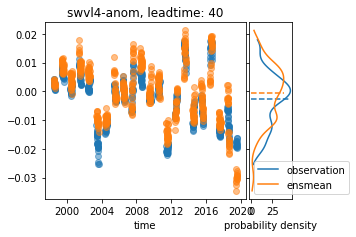

climatology directly loaded


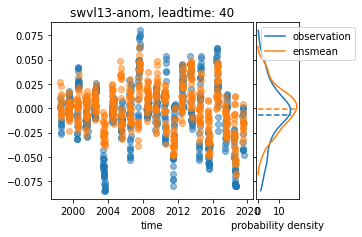

In [55]:
for var in combinations.index:
    leadtime = 40
    comp = get_match_frame(var)
    df = comp.frame.compute()
    df['ensmean'] = df['forecast'].mean(axis = 1)
    data = get_subset_at(frame = df, leadtime = leadtime)
    fig, ax, ax_hist = fancy_plot(data)
    ax.set_title(f'{var}-anom, leadtime: {leadtime}')
    plt.legend()
    plt.show()

For SST a mean anomalie mismatch is present. Not very surprising as they got their climatology determined by a different reference period. (median observed SST anomaly in the common period will be > 0)

At all leadtimes we expact the overall mean forecast anomaly to be close to zero (drift in the mean should be accounted for, also those 

Also here the control member often behaves differently.

climatology directly loaded


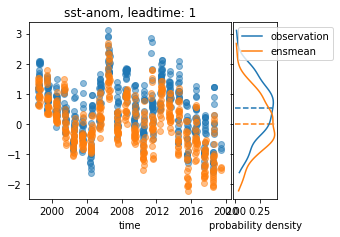

climatology directly loaded


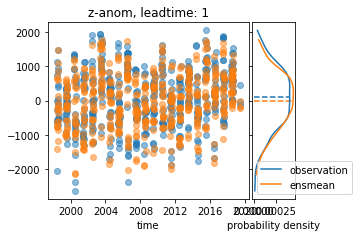

climatology directly loaded


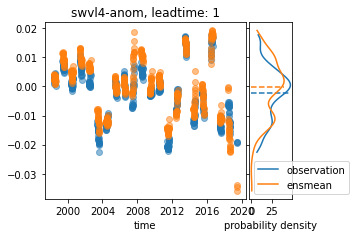

climatology directly loaded


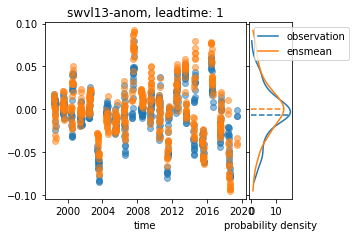

In [56]:
for var in combinations.index:
    leadtime = 1
    comp = get_match_frame(var)
    df = comp.frame.compute()
    df['ensmean'] = df['forecast'].mean(axis = 1)
    data = get_subset_at(frame = df, leadtime = leadtime)
    fig, ax, ax_hist = fancy_plot(data)
    ax.set_title(f'{var}-anom, leadtime: {leadtime}')
    plt.legend()
    plt.show()

## incorporating dynamical information in paper2 model
Check the effect on skill of the standard t2m_average_Xdays exceeding a certain quantile. Hybrid forecasts.
The simple extra predictors to choose are 7day t2m, z300 and swvl13, and sst (the former in the area, the latter in two clusters).

In [6]:
import itertools
import sys
sys.path.append('/usr/people/straaten/Documents/Weave/')
from sklearn.metrics import brier_score_loss

In [7]:
from Weave.models import fit_predict, evaluate, map_foldindex_to_groupedorder, HybridExceedenceModel, BaseExceedenceModel

No perfect correspondance to the CV folds as in the pure ERA5 data. We now have about 20 years less data. Therefore manually split the data. 2013+ was part of the validation fold 4 test.

In [111]:
def prepare_old_and_new_data(oldrespagg = 7, separation = -11, quantile = 0.75, which_new = ['tg']):
    """
    Separation terminology from the old, is basically leadtime -1 
    new data is just the ensemble mean.
    returns X_train, X_test, X_
    """
    def read_new(var = 'tg', separation = -11):
        al = ForecastToObsAlignment('JJA','45r1')
        al.recollect(booksname = combinations.loc[var,'books'])
        modelinfo = al.alignedobject.compute()
        modelinfo['separation'] = - (modelinfo['leadtime'] - 1) # Day 1 is immediately after initialization, so zero separation
        if var == 'tg': # Then we need a specific region, as here there are 15
            modelinfo = modelinfo.loc[np.logical_and(modelinfo['clustid'] == 9, modelinfo['separation'] == separation), :]
        else: # otherwise just grab all the clusters.
            modelinfo = modelinfo.loc[modelinfo['separation'] == separation, :]
        modelinfo = modelinfo.set_index(['time','clustid'])
        modelinfo['ensmean'] = modelinfo['forecast'].mean(axis = 1)
        to_merge = modelinfo[['ensmean']].unstack('clustid') # preparing the multi-index to align with old data. Fold 4 is what we'll later select
        to_merge.columns = pd.MultiIndex.from_product([(4,),(f'{var}_ensmean',),(7,),(separation-7,),(separation,),to_merge.columns.get_level_values('clustid'),('mean',)], names = ['fold','variable','timeagg','lag','separation','clustid','metric'])
        return to_merge
    
    # preliminary read to get the new (shorter) index. ERA5 is 40 years, hindcasts are 20 years.
    temp = read_new(var = 'tg', separation = separation)
    
    # reading old first
    X_paper2  = '/nobackup_1/users/straaten/clusters_cv_spearmanpar_varalpha_strict/precursor.multiagg.parquet'
    y_paper2  = '/nobackup_1/users/straaten/clusters_cv_spearmanpar_varalpha_strict/response.multiagg.trended.parquet'
    y = pd.read_parquet(y_paper2).loc[:,(slice(None),oldrespagg,slice(None))].iloc[:,0] # Only summer
    X = pd.read_parquet(X_paper2).loc[y.index,(slice(None),slice(None),slice(None),slice(None),separation,slice(None),slice(None))].dropna(axis = 0, how = 'any') 
    y = y > y.quantile(quantile)
    map_foldindex_to_groupedorder(X = X, n_folds = 5) # important, otherwise no proper train-test split.
    X = X.loc[temp.index,:]
    
    for basevar in which_new:
        X = X.merge(read_new(var= basevar, separation = separation), how = 'inner', left_index = True, right_index = True) # can remove extra rows
        
    y = y.reindex(X.index) # Shape matching because of possible Nan's
    # some temporal slicing for train test. No alignment, so manual and selection of fold 4
    traintime = slice('1998-06-01','2012-06-01')
    testtime = slice('2012-06-01',None)
    return(X.loc[traintime,4], y.loc[traintime], X.loc[testtime,4], y.loc[testtime])

In [8]:
X_paper2  = '/nobackup_1/users/straaten/clusters_cv_spearmanpar_varalpha_strict/precursor.multiagg.parquet'
X = pd.read_parquet(X_paper2)
order = map_foldindex_to_groupedorder(X = X, n_folds = 5, return_foldorder=True)

In [13]:
order.reset_index()

SyntaxError: invalid syntax (1981097812.py, line 1)

In [112]:
params = dict(fit_base_to_all_cv = False, max_depth = 5, n_estimators = 2500, min_samples_split = 30, max_features = 35, n_jobs = 5)

# all combinations to test.
respaggs = [7,11,15]
separations = [-1, -3, -5, -7, -11, -15, -21, -31]
extras = [[]] + list(itertools.accumulate([['tg'],['z'],['sst'],['swvl13']]))
extras_concat = [''.join(l) for l in extras]

brierresults = pd.Series(np.nan, index = pd.MultiIndex.from_product([respaggs,separations,extras_concat], names = ['respagg','separation','extras']))
for respagg, separation, (extra, extra_name) in itertools.product(respaggs, separations, zip(extras, extras_concat)):
    X_train, y_train, X_test, y_test = prepare_old_and_new_data(oldrespagg = respagg, separation = separation, quantile = 0.75, which_new = extra)
    h = HybridExceedenceModel(**params)
    h.fit(X = X_train, y = y_train)
    pred = h.predict(X = X_test)
    result = evaluate(y_pred = pred, y_true = y_test, scores = [brier_score_loss], score_names = ['bs'])
    brierresults.loc[(respagg,separation,extra_name)] = result.values

/usr/people/straaten/Documents/Weave/Weave/models.py:70: UserWarning: BaseExceedenceModel shows a negative dependence on time, so a negative climate change trend. Is your procedure for creating y correct?
  warnings.warn('BaseExceedenceModel shows a negative dependence on time, so a negative climate change trend. Is your procedure for creating y correct?')
/usr/people/straaten/Documents/Weave/Weave/models.py:70: UserWarning: BaseExceedenceModel shows a negative dependence on time, so a negative climate change trend. Is your procedure for creating y correct?
  warnings.warn('BaseExceedenceModel shows a negative dependence on time, so a negative climate change trend. Is your procedure for creating y correct?')
/usr/people/straaten/Documents/Weave/Weave/models.py:70: UserWarning: BaseExceedenceModel shows a negative dependence on time, so a negative climate change trend. Is your procedure for creating y correct?
  warnings.warn('BaseExceedenceModel shows a negative dependence on time, so 

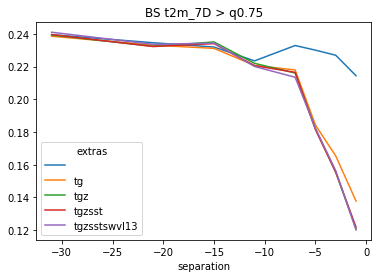

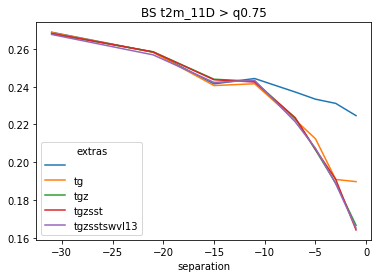

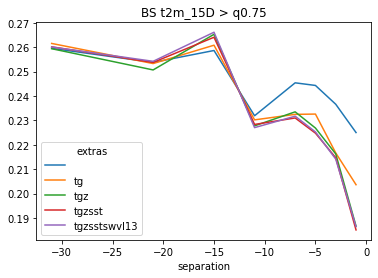

In [125]:
for respagg in respaggs:
    brierresults.loc[respagg].unstack('extras').plot(title = f'BS t2m_{respagg}D > q0.75')

One conclusion is that with including the simple block predictors there is a benefit at shorter leadtimes but none at the sub-seasonal. This absence of ‘magic’ might have to do with the fact the amount of data-driven predictors is still large and the dynamic data-points now more limited.

But then, as shown above, the intermediate variables need not be forecast perfectly.